In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE

import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd


In [2]:
import zipfile
with zipfile.ZipFile('./trafficsigns_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [3]:
val_signs = ['diamond', 'triangle', 'hex']

In [4]:
from PIL import Image
import glob

image_list = []
for filepath in glob.glob('./trafficsigns_dataset\\*\\*\\*.png', recursive=True):
    filename = filepath.split("\\")[-1]
    shape = filepath.split("\\")[-3]#shape of sign
    label = filepath.split("\\")[-2] #type of sign
    polenumber = filename.split("_")[-1]
    val_train = shape in val_signs
    image_list.append((filepath, shape, int(val_train)))
    
data = pd.DataFrame(data=image_list, columns=['image_path', 'sign_shape', 'isVal'])

#file_name = 'traffic.xlsx'
#  
## saving the excel
#data.to_excel(file_name)
#
#data.head()
data['sign_shape'].unique()
data.head()

,image_path,sign_shape,label,isVal
0,./trafficsigns_dataset\diamond\rightofway\0003...,diamond,rightofway,1
1,./trafficsigns_dataset\diamond\rightofway\0003...,diamond,rightofway,1
2,./trafficsigns_dataset\diamond\rightofway\0003...,diamond,rightofway,1
3,./trafficsigns_dataset\diamond\rightofway\0003...,diamond,rightofway,1
4,./trafficsigns_dataset\diamond\rightofway\0003...,diamond,rightofway,1


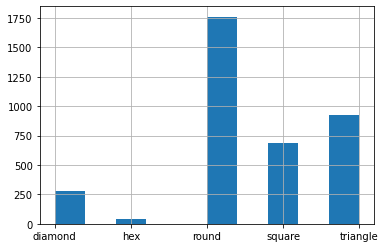

,image_path,sign_shape,label,isVal
0,./trafficsigns_dataset\diamond\rightofway\0003...,diamond,rightofway,1
1,./trafficsigns_dataset\diamond\rightofway\0003...,diamond,rightofway,1
2,./trafficsigns_dataset\diamond\rightofway\0003...,diamond,rightofway,1
3,./trafficsigns_dataset\diamond\rightofway\0003...,diamond,rightofway,1
4,./trafficsigns_dataset\diamond\rightofway\0003...,diamond,rightofway,1


In [5]:
data.sign_shape.hist()
#plt.rcParams["figure.figsize"] = (15,15)
plt.show()
data.head()

data[data['isVal']==1].head()

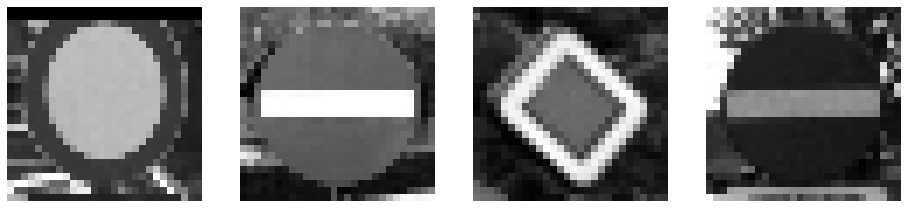

In [6]:
r_inx = np.random.choice(1000, 4)
rand_data = data.loc[r_inx,'image_path']

plt.figure(figsize=(16,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,4,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()

In [7]:
d = {'hex':0, 'diamond':1, 'round':2, 'square':3, 'triangle':4}
data['labels_num'] = data['sign_shape'].map(d, na_action='ignore')

In [8]:
train_df = data[data['isVal']==0].reset_index()
validation_df = data[data['isVal']==1].reset_index()
print('Train size: {}, Val size: {}'.format(train_df.shape[0], validation_df.shape[0] ) )
N_train_images = train_df.shape[0]
N_val_images = validation_df.shape[0]

train_df.to_csv('SignTrainData.csv')
validation_df.to_csv('SignValData.csv')

Train size: 2448, Val size: 1251


In [9]:
INPUT_DIM = (28,28,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 5

In [10]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2352)              0         
                                                                 
 dense (Dense)               (None, 256)               602368    
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 603,653
Trainable params: 603,653
Non-trainable params: 0
_________________________________________________________________


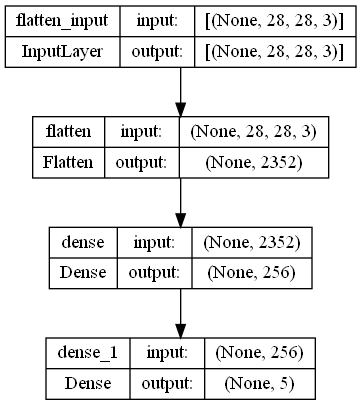

In [12]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [13]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        directory='./',
        x_col="image_path",
        y_col="sign_shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=validation_df,
        directory='./',
        x_col="image_path",
        y_col="sign_shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2448 validated image filenames belonging to 2 classes.
Found 1251 validated image filenames belonging to 3 classes.


In [15]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=150, verbose=0)

C:\Users\lakin\AppData\Local\Temp\ipykernel_9912\2399507332.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=150, verbose=0)


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelapp.py", line 707, in start
      self.io_loop.start()
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 600, in run_forever
      self._run_once()
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\asyncio\base_events.py", line 1896, in _run_once
      handle._run()
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 502, in dispatch_queue
      await self.process_one()
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 491, in process_one
      await dispatch(*args)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 398, in dispatch_shell
      await result
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\kernelbase.py", line 722, in execute_request
      reply_content = await reply_content
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\ipkernel.py", line 389, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\lakin\AppData\Local\Temp\ipykernel_9912\2399507332.py", line 1, in <cell line: 1>
      history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=150, verbose=0)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 2260, in fit_generator
      return self.fit(
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "C:\Users\lakin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py", line 5134, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[32,5] labels_size=[32,2]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_493]